In [1]:
## Install Dependencies

!pip install nltk
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
## Method for getting input
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download("punkt")
nltk.download('wordnet')
nltk.download("stopwords")

def parse_text(text):

    ## Tokenize string into words (and punctuation)
    word_array = word_tokenize(text)
    word_array = [word.lower() for word in word_array if word.isalpha()]

    ## Filter out stop words
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in word_array if word.casefold() not in stop_words]

    ## Turn words into lemmatized words
    lemmatizer = WordNetLemmatizer()
    lemitized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    ## Apply Stemming (Find the roots of similar words)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemitized_words]

    return stemmed_words

[nltk_data] Downloading package punkt to /home/birdy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/birdy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/birdy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
## Method for getting input
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
import re
nltk.download("punkt")
nltk.download('wordnet')
nltk.download("stopwords")

def parse_text(text):

    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    ## Tokenize string into words (and punctuation)
    text_list = word_tokenize(text)
    

    ## Filter out stop words
    stop_words = stopwords.words("english")
    stop_words.extend(["xc","xa","r","n", "x"])

    text = [word for word in text_list if word not in stop_words and len(word) > 1]

    joined_words = ""
    #for word in stemmed_words:
    joined_words = " ".join(list(text))
    return joined_words



[nltk_data] Downloading package punkt to /home/birdy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/birdy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/birdy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
parse_text("This is an example of a JIRA description. It has many sentences and punctuation!")

'example jira description many sentences punctuation'

In [31]:
import pandas as pd
import csv
dataframe = pd.read_csv("combined_dataset.csv")
dataframe = dataframe.drop(dataframe.columns[[0]], axis=1)
list_vocab = dataframe['desc'].to_list()
end_list = []
for line in list_vocab:
    #line = line.to_string()
    end_list.append(parse_text(line)) 
    
dataframe['desc'] = end_list
dataframe.to_csv("combined_dataset2.csv", index=False)

joined_text = " ".join(end_list)
joined_text= joined_text.split(' ')
joined_text = list(set(joined_text))

dataframe2 = pd.DataFrame()
dataframe2['vocab'] = joined_text
dataframe2.to_csv("new_vocab.csv", columns=['vocab'] , index=False, header=False)


# string_vocab = dataframe['desc'].to_string()
# #string_vocab.to_csv("vocabulary.csv", index=False)
# #print(string_vocab)

# parsed_text = parse_text(string_vocab)
# parsed_text = set(parsed_text)
# parsed_text = list(parsed_text)
# # unique = set(string_vocab.split(' '))
# # print(unique)
# # with open('vocab.csv', 'w') as f:
# #     writer = csv.writer(f)
# #     for word in unique:
# #         writer.writerow([word])

# #unique = set(parsed_text.split(' '))
# #print(parsed_text)
# with open('vocab3.csv', 'w') as f:
#     writer = csv.writer(f)
#     for word in parsed_text:
#         writer.writerow([word])

In [37]:
import numpy as np
uniques, counts = np.unique(joined_text, return_counts=True)
print(uniques[:10])

['' 'aa' 'aaa' 'aaaa' 'aaaaa' 'aaaaaa' 'aaaaaaaa' 'aaaaaaaaa' 'aaaaaaaaaa'
 'aaaaaaaaaaaaaaaaa']


               word
0           upgrade
1           improve
2  suppresswarnings
3   keeperexception
4              thus
               word
0           upgrade
1           improve
2  suppresswarnings
3   keeperexception
4              thus
{'upgrad': 1446, 'improv': 617, 'suppresswarn': 2, 'keeperexcept': 1, 'thu': 5, 'need': 1853, 'new': 1666, 'filesnap': 1, 'nul': 8, 'treat': 29, 'quorum': 12, 'write': 531, 'oper': 417, 'failur': 519, 'run': 1778, 'apt': 28, 'updat': 1992, 'inst': 21, 'recent': 547, 'read': 562, 'datatre': 1, 'class': 822, 'c': 916, 'client': 711, 'test': 4210, 'pa': 274, 'ci': 450, 'code': 3242, 'cleanup': 121, 'appli': 165, 'diamond': 3, 'con': 163, 'develop': 305, 'zookeep': 172, 'often': 98, 'start': 818, 'order': 506, 'su': 79, 'node': 410, 'avail': 160, 'http': 3839, 'offici': 34, 'java': 1703, 'use': 4703, 'jackson': 110, 'databind': 15, 'owap': 1, 'report': 905, 'common': 202, 'cli': 175, 'due': 455, 'owasp': 36, 'fail': 1998, 'publish': 108, 'sbom': 2, 'arti

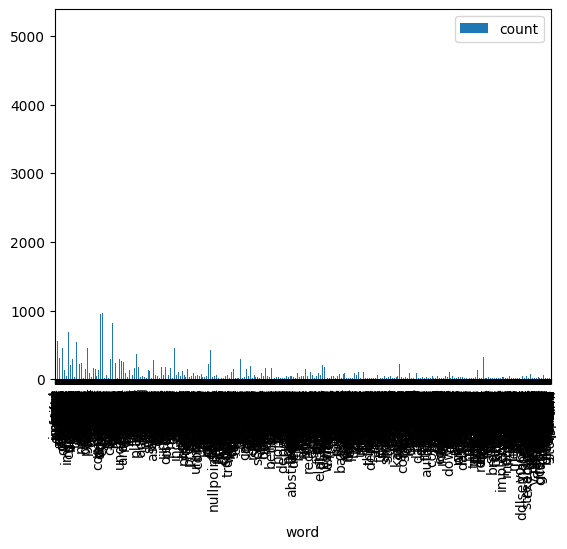

In [40]:
## Build Vocabulary Using Parser ##
from nltk.stem import PorterStemmer

dups = pd.read_csv("vocab_with_dup.csv",names = ["word"])
print(dups.head())
dups.sort_values(by=['word']) 
print(dups.head())
word_dist_dict = {}
stemmer = PorterStemmer()

for index, row in dups.iterrows():
    row["word"] = stemmer.stem(str(row["word"]))
    if row["word"] not in word_dist_dict.keys(): 
        word_dist_dict[row["word"]] = 1 
    else: 
        word_dist_dict[row["word"]]+=1

count_df = pd.DataFrame(word_dist_dict.items(), columns = ["word","count"]) 
filtered_count_df = count_df[count_df["count"] > 10] 
print(filtered_count_df.count())
#count_df.drop_duplicates()
filtered_count_df.plot.bar(x="word", y="count") 
filtered_count_df = filtered_count_df.sort_values(by="word")

filtered_count_df["word"].to_csv("reduced_vocabulary.csv", index=False)


In [43]:
## One Hot Encoder Method
# We will make an array the size of the vocabulary that is passed in and encode it with the passed in array of strings.
import numpy as np

def oneHotEncoder(vocab, input):
    ## Make an array size of the vocab
    encoderMatrix = np.zeros(len(vocab))

    ## Iterate the input strings and encode their position in the array
    for word in input:
        index = vocab[vocab['word']==word].index.values
        encoderMatrix[index] += 1
    
    return encoderMatrix

In [45]:
## Test Encoder
vocabulary = pd.read_csv("reduced_vocabulary.csv")
input = "As a storeroom manager creating a requisition, I want my requisitions to be converted to an order according to [#OLMIS-643] for my filling warehouse once my requisition has been approved so that supplying warehouse is aware of my stock needs.\r\n\r\n+Acceptance Criteria+\r\n_Verify That_\r\n* approved requisitions are converted to an order (an order file is created)\r\n* an order object is associated with the requisition\r\n* requisition status is updated\r\n* an unique order number is assigned (order number is generated based on the order number configuration)"

## Parse the input
parsed = parse_text(input)

## Encode the text
encoded = oneHotEncoder(vocabulary, parsed)

print(encoded)

[0. 0. 0. ... 0. 0. 0.]
